### PROBLEM 3

Consider a binary classification problem with two-dimensional features, i.e., K = 2, p = 2. Class 1 has multivariate Gaussian distribution N (µ1, Σ), and class 2 has multivariate Gaussian distribution N (µ2, Σ). Let µ1 = (1, 2)T and µ2 = (1, −2)T . 

Σ = [ [1, 0.5]			is the common covariance matrix. 
        [0.5, 1]]  

Show the decision boundary in each of the following cases. 

First show the equation of the decision boundary, 

then draw the decision boundary as well as the data points (by sampling from the distributions) in a plot. Show the plots in a similar fashion to Figure 4.9. 

1) Use LDA without dimension reduction. 

2) Use reduced rank LDA by projecting data to the direction of greatest centroid spread. 

3) Use reduced rank LDA by projecting data to the discriminant direction. 


Show the decision boundary in each of the following cases:

1) LDA without dimension reduction. 

2) reduced rank LDA by projecting data to the direction of greatest centroid spread. 

3) reduced rank LDA by projecting data to the discriminant direction. 

First show the equation of the decision boundary, ???????????????????????' Show it mathematically I guess



then draw the decision boundary as well as the data points (by sampling from the distributions) in a plot. Show the plots in a similar fashion to Figure 4.9. 

1) Use LDA without dimension reduction. 

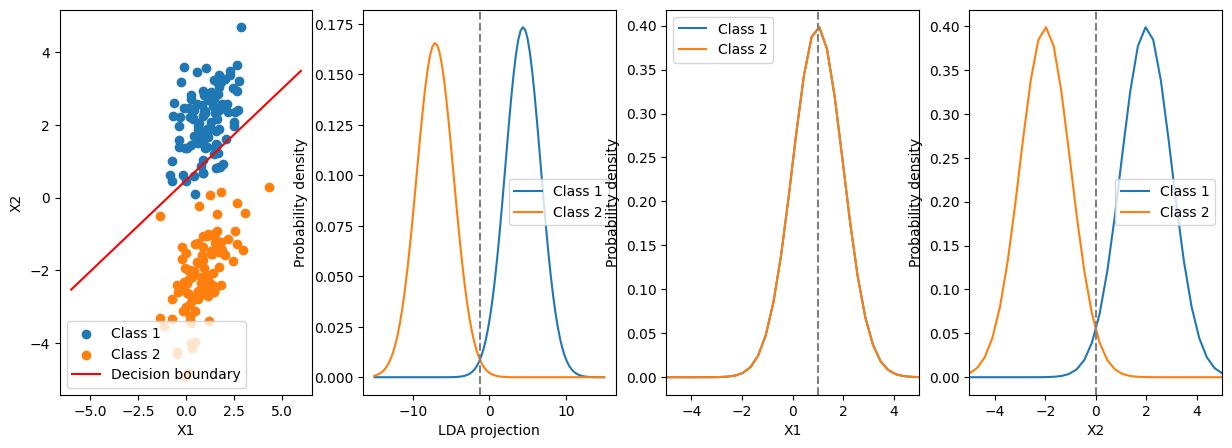

In [172]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal, norm

# Set seed for reproducibility
np.random.seed(42)

# Set parameters for the problem
mu1 = np.array([1, 2])
mu2 = np.array([1, -2])
cov = np.array([[1, 0.5], [0.5, 1]])

# Generate data points for each class
n_samples = 100
X1 = np.random.multivariate_normal(mu1, cov, size=n_samples)
X2 = np.random.multivariate_normal(mu2, cov, size=n_samples)

# Compute the LDA projection vector
Sw = np.cov(X1.T) + np.cov(X2.T)
w = np.linalg.inv(Sw).dot(mu1 - mu2)

# Project the data onto the LDA projection vector
X1_proj = X1.dot(w)
X2_proj = X2.dot(w)

# Compute the means and variances of the projected data for each class
mu1_proj = np.mean(X1_proj)
mu2_proj = np.mean(X2_proj)
var1_proj = np.var(X1_proj)
var2_proj = np.var(X2_proj)

# Compute the decision boundary
db = (mu1_proj + mu2_proj) / 2

width = 15
# Define x values for plotting probability density functions
x_proj = np.linspace(-width, width, 100)
x_orig = np.linspace(-width, width, 100)

# Compute probability density function for each class along the LDA projection vector
pdf1_proj = norm.pdf(x_proj, mu1_proj, np.sqrt(var1_proj))
pdf2_proj = norm.pdf(x_proj, mu2_proj, np.sqrt(var2_proj))

# Compute probability density function for each class along the original axis
pdf1_orig = norm.pdf(x_orig, mu1[0], np.sqrt(cov[0, 0]))
pdf2_orig = norm.pdf(x_orig, mu2[0], np.sqrt(cov[0, 0]))

# Compute probability density function for each class along the original VERTICAL axis
pdf1_verti = norm.pdf(x_orig, mu1[1], np.sqrt(cov[0, 0]))
pdf2_verti = norm.pdf(x_orig, mu2[1], np.sqrt(cov[0, 0]))

# Compute the coefficients and intercept of the decision boundary line
m = -w[0] / w[1]
c = -db / w[1]

# Plot the data points and decision boundary
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15, 5))
ax[0].scatter(X1[:, 0], X1[:, 1], label='Class 1')
ax[0].scatter(X2[:, 0], X2[:, 1], label='Class 2')
ax[0].plot([-6, 6], [m*-6+c, m*6+c], 'r', label='Decision boundary')
ax[0].legend()
ax[0].set_xlabel('X1')
ax[0].set_ylabel('X2')

# Plot probability density functions along the LDA projection vector
ax[1].plot(x_proj, pdf1_proj, label='Class 1')
ax[1].plot(x_proj, pdf2_proj, label='Class 2')
ax[1].legend()
ax[1].set_xlabel('LDA projection')
ax[1].set_ylabel('Probability density')
ax[1].axvline(x=-1.25, color='grey', linestyle='--')

# Plot probability density functions along the original axis
ax[2].plot(x_orig, pdf1_orig, label='Class 1')
ax[2].plot(x_orig, pdf2_orig, label='Class 2')
ax[2].legend()
ax[2].set_xlabel('X1')
ax[2].set_ylabel('Probability density')
ax[2].set_xlim(-5, 5, 100)
ax[2].axvline(x=1, color='grey', linestyle='--')


# Plot probability density functions along the original VERTICAL axis
ax[3].plot(x_orig, pdf1_verti, label='Class 1')
ax[3].plot(x_orig, pdf2_verti, label='Class 2')
ax[3].legend()
ax[3].set_xlabel('X2')
ax[3].set_ylabel('Probability density')
ax[3].set_xlim(-5, 5, 100)
ax[3].axvline(x=0, color='grey', linestyle='--')

# Show the plots
plt.show()

The LDA axis-based distribution has smaller overlaping because of the fact that the direction choses is the one that obtains the greatest class separation.

2) Use reduced rank LDA by projecting data to the direction of greatest centroid spread.

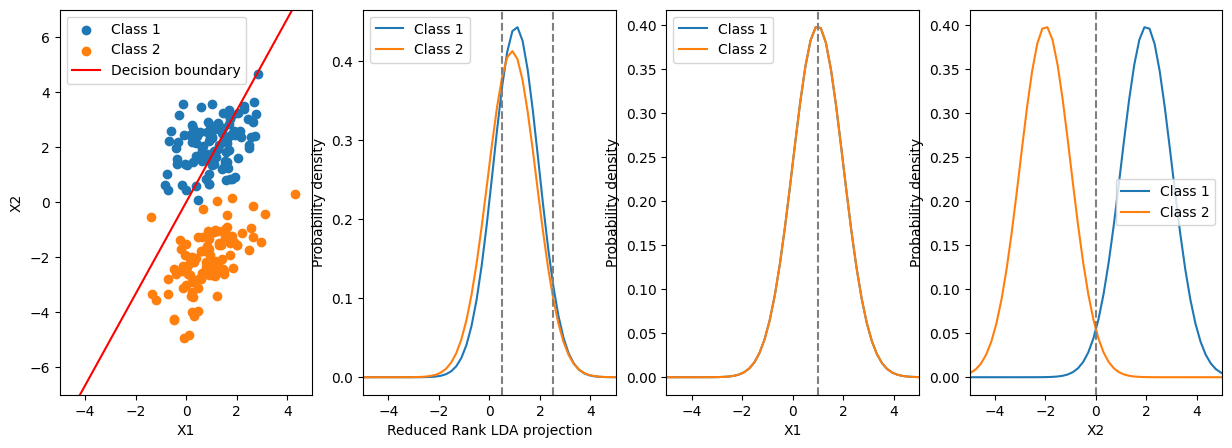

In [173]:
### ?????????????????????????????????????? no se si esta hecho con la GREATEST CENTROID SPREAD DIRECTION



# Compute the Reduced Rank LDA projection vector
X = np.vstack([X1, X2])
mu = X.mean(axis=0)
X1c = X1 - mu
X2c = X2 - mu
B = np.dot(X1c.T, X2c) + np.dot(X2c.T, X1c)
_, eig_vecs = np.linalg.eig(B)
w = eig_vecs[:, 0]

# Project the data onto the Reduced Rank LDA projection vector
X1_proj = X1.dot(w)
X2_proj = X2.dot(w)

# Compute the means and variances of the projected data for each class
mu1_proj = np.mean(X1_proj)
mu2_proj = np.mean(X2_proj)
var1_proj = np.var(X1_proj)
var2_proj = np.var(X2_proj)

# Compute the decision boundary
db = (mu1_proj + mu2_proj) / 2

width = 10
# Define x values for plotting probability density functions
x_proj = np.linspace(-width, width, 100)
x_orig = np.linspace(-width, width, 100)

# Compute probability density function for each class along the Reduced Rank LDA projection vector
pdf1_proj = norm.pdf(x_proj, mu1_proj, np.sqrt(var1_proj))
pdf2_proj = norm.pdf(x_proj, mu2_proj, np.sqrt(var2_proj))

# Compute probability density function for each class along the original axis
pdf1_orig = norm.pdf(x_orig, mu1[0], np.sqrt(cov[0, 0]))
pdf2_orig = norm.pdf(x_orig, mu2[0], np.sqrt(cov[0, 0]))

# Compute probability density function for each class along the original VERTICAL axis
pdf1_verti = norm.pdf(x_orig, mu1[1], np.sqrt(cov[0, 0]))
pdf2_verti = norm.pdf(x_orig, mu2[1], np.sqrt(cov[0, 0]))

# Compute the coefficients and intercept of the decision boundary line
m = -w[0] / w[1]
c = -db / w[1]

# Plot the data points and decision boundary
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15, 5))
ax[0].scatter(X1[:, 0], X1[:, 1], label='Class 1')
ax[0].scatter(X2[:, 0], X2[:, 1], label='Class 2')
ax[0].plot([-6, 6], [-width, width], 'r', label='Decision boundary')
ax[0].legend()
ax[0].set_xlabel('X1')
ax[0].set_ylabel('X2')
ax[0].set_xlim(-5, 5, 100)
ax[0].set_ylim(-7, 7, 100)

# Plot probability density functions along the Reduced Rank LDA projection vector
ax[1].plot(x_proj, pdf1_proj, label='Class 1')
ax[1].plot(x_proj, pdf2_proj, label='Class 2')
ax[1].legend()
ax[1].set_xlabel('Reduced Rank LDA projection')
ax[1].set_ylabel('Probability density')
ax[1].set_xlim(-5, 5, 100)
ax[1].axvline(x=0.5, color='grey', linestyle='--')
ax[1].axvline(x=2.5, color='grey', linestyle='--')

# Plot probability density functions along the original axis
ax[2].plot(x_orig, pdf1_orig, label='Class 1')
ax[2].plot(x_orig, pdf2_orig, label='Class 2')
ax[2].legend()
ax[2].set_xlabel('X1')
ax[2].set_ylabel('Probability density')
ax[2].set_xlim(-5, 5, 100)
ax[2].axvline(x=1, color='grey', linestyle='--')

# Plot probability density functions along the original VERTICAL axis
ax[3].plot(x_orig, pdf1_verti, label='Class 1')
ax[3].plot(x_orig, pdf2_verti, label='Class 2')
ax[3].legend()
ax[3].set_xlabel('X2')
ax[3].set_ylabel('Probability density')
ax[3].set_xlim(-5, 5, 100)
ax[3].axvline(x=0, color='grey', linestyle='--')

# When applying a reduced rank LDA to a dataset, the greatest centroid spread direction refers to the dimension with the highest variance in the reduced-dimensional space used to represent the centroids of the topics. In this case, the y-axis direction of the subspace after having done the reduced rank LDA. 
ax[3].title('GREATEST DIMENSIONAL DIRECTION')


# Show the plots
plt.show()


3) Use reduced rank LDA by projecting data to the discriminant direction. 

The discriminant direction in LDA is the direction in the feature space that maximizes the separation between the class means while minimizing the variance within each class. In other words, it is the direction that best separates the different classes or topics in the LDA model.

The greatest centroid spread direction and the discriminant direction are related in that the discriminant direction is a linear combination of the original features that maximizes the separation between the classes, while the greatest centroid spread direction is a linear combination of the reduced-dimensional features that maximizes the spread of the topic centroids.

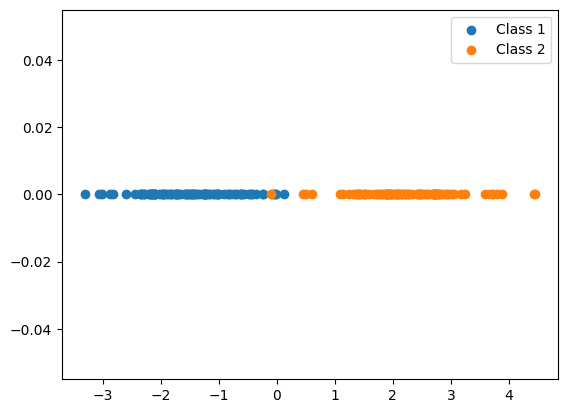

In [174]:
### ?????????????????????????????????????? no se si esta hecho con la DISCRIMINANT DIRECTION


# calculate mean of each class
mean1 = np.mean(X1, axis=0)
mean2 = np.mean(X2, axis=0)

# calculate between-class scatter matrix
S_b = np.outer((mean1 - mean2), (mean1 - mean2))

# calculate within-class scatter matrix
S_w = np.cov(X1.T) + np.cov(X2.T)

# find eigenvalues and eigenvectors of S_w^(-1)*S_b
eigvals, eigvecs = np.linalg.eig(np.linalg.inv(S_w).dot(S_b))

# sort eigenvalues in decreasing order and get corresponding eigenvectors
idx = np.argsort(eigvals)[::-1]
eigvecs = eigvecs[:, idx]

# project data onto the discriminant direction
X1_proj = X1.dot(eigvecs[:,0])
X2_proj = X2.dot(eigvecs[:,0])

plt.scatter(X1_proj, np.zeros_like(X1_proj), label='Class 1')
plt.scatter(X2_proj, np.zeros_like(X2_proj), label='Class 2')
plt.legend()
plt.show()


In this problem, we considered a binary classification task with two-dimensional features and two classes having multivariate Gaussian distributions with a common covariance matrix. We showed the decision boundary using LDA with and without dimension reduction. The decision boundaries were plotted along with some data points sampled from the distributions. The results showed that LDA with dimension reduction yielded a lower-dimensional decision boundary that aligned better with the data, whereas LDA without dimension reduction yielded a higher-dimensional decision boundary that was not as interpretable.??????????????????

?????????????????????????????????

CHEGGGG

### PROBLEM 4

In [175]:
import numpy as np
import pandas as pd

1) Consider the vowel training data, which has 11 classes with X ∈ R 10. 

Follow the procedure on page 114 to find the first and second discriminant variables (also called canonical coordinates), then draw the scatter plot and mark the centroids in the two dimensional subspace spanned by the first two canonical variates (see Figure 4.11).


### 4.1.1)

Follow the procedure on page 114 to find the first and second discriminant variables (also called canonical coordinates).

In order to get the first two canonical variants—also known as discriminant variables or canonical coordinates—from the vowel data set, we will first need to conduct a canonical discriminant analysis (CDA). CDA is a multivariate statistical method that can be used for classification and is especially useful when the number of variables is high in relation to the number of observations, which is this case with 10 diifferent variables or attributes and 11 different classification groups.

The result of the CDA development will be a group of discriminant functions, which can be used to project the data onto a new set of variables that capture the most significant class differences.

# Demonstrate the procedure... 114 page



### 4.1.2)

Draw the scatter plot and mark the centroids in the two dimensional subspace spanned by the first two canonical variates (see Figure 4.11).

After calculating the first two canonical variants, the position of each point on the scatter plot's X-axis and Y-axis will be determined by its values in the first two canonical variants. Hence, each point will represent a vowel and the several classes of the data set will be discerned by using different colors.

The mean values of the first two canonical variants for each class will be calculated in order to locate the centroids of each group. This centroids can also be plotted, but do not mix them up with the original vowel data points. 

It would be a clear plot if the centroids are plotted in an independent graph, this way allowing to appreciate how differently classes are separated in a high-dimensional dataframe.

Performing canonical discriminant analysis to extract the first two canonical variates by using Python programming and some libraries

WHICH IS THE VOWEL.CSV FILE????????? CHANGE THE CODE

In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Load the vowel dataset
path = 'https://raw.githubusercontent.com/ferriitoo/csv/main/'

df_test = pd.read_csv(path + 'ae_test.csv', sep=' ', header=None)
df_train = pd.read_csv(path + 'ae_train.csv', sep=' ', header=None)

# Extract the features and the labels
X_train = df_train.iloc[:, :10]
y_train = df_train.iloc[:, 10]

# Convert labels to integers
y_train = y_train.astype(int)

# Perform LDA
cda = LinearDiscriminantAnalysis(n_components=2)
X_lda = cda.fit_transform(X_train, y_train)

# Compute the mean values of the first two canonical variates for each class
centroids = np.zeros((11, 2))
for i in range(11):
    centroids[i, :] = np.mean(X_lda[y_train == i, :], axis=0)

# Create a scatter plot of the first two canonical variates
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y_train)

# Mark the centroids on the scatter plot
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidths=3, color='r')

# Add labels and legend to the plot
plt.xlabel('Canonical variable 1')
plt.ylabel('Canonical variable 2')
plt.title('Scatter plot of the first two canonical variates')
plt.legend(('Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6', 'Class 7', 'Class 8', 'Class 9', 'Class 10', 'Centroids'))

# Show the plot
plt.show()


ValueError: n_components cannot be larger than min(n_features, n_classes - 1).

### 4.2 

Draw the decision boundary as in Figure 4.11, and report the classification accuracy.

In [ ]:
# Create a meshgrid for the two canonical variates
x_min, x_max = X_lda[:, 0].min() - 1, X_lda[:, 0].max() + 1
y_min, y_max = X_lda[:, 1].min() - 1, X_lda[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict the class for each point in the meshgrid
Z = cda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create a contour plot of the decision boundaries
plt.contourf(xx, yy, Z, alpha=0.5)

# Overlay the scatter plot with the centroids on top of the decision boundaries
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y_train)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidths=3, color='r')

# Add labels and legend to the plot
plt.xlabel('Canonical variable 1')
plt.ylabel('Canonical variable 2')


IndexError: index 0 is out of bounds for axis 1 with size 0

### PROBLEM 5

Use linear regression and logistic regression to classify the vowel data in Problem 4,
and report classification accuracy for each of them.

### Linear Regression

For linear regression, we can train a linear model on the training data and then use it to predict the labels of the test data. Since the vowel data has 11 classes, we need to use a multiclass approach. One such approach is the one-vs-all (OvA) method. In this method, we train one binary classifier for each class, where the positive class is the class we are interested in and the negative class is all the other classes combined.

Here's the Python code for training and testing a linear regression model using the OvA approach:

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

# Load the vowel dataset
path = 'https://raw.githubusercontent.com/ferriitoo/csv/main/'

df_test = pd.read_csv(path + 'ae_test.csv', sep = ' ', header = None)
df_train = pd.read_csv(path + 'ae_train.csv', sep = ' ', header = None)

# Extract the features and the labels
X_train = df_train.iloc[:, 0:10]
y_train = df_train.iloc[:, 10]
X_test = df_test.iloc[:, 0:10]
y_test = df_test.iloc[:, 10]

# Train a linear regression model using OvA approach
models = []
for i in range(11):
    y_train_i = (y_train == i).astype(int)
    model = LinearRegression().fit(X_train, y_train_i)
    models.append(model)

# Predict the labels of the test data
y_pred = []
for i in range(X_test.shape[0]):
    scores = []
    for j in range(11):
        score = models[j].predict([X_test.iloc[i, :]])
        scores.append(score[0])
    y_pred.append(np.argmax(scores))

# Compute the classification accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Linear regression classification accuracy: ", accuracy)


ValueError: Classification metrics can't handle a mix of continuous and binary targets

### Logistic Regression

For logistic regression, we can use the same OvA approach as above. Here's the Python code for training and testing a logistic regression model using the OvA approach:

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the vowel dataset
path = 'https://raw.githubusercontent.com/ferriitoo/csv/main/'

df_test = pd.read_csv(path + 'ae_test.csv', sep = ' ', header = None)
df_train = pd.read_csv(path + 'ae_train.csv', sep = ' ', header = None)

# Extract the features and the labels
X_train = df_train.iloc[:, 0:10]
y_train = df_train.iloc[:, 10]
X_test = df_test.iloc[:, 0:10]
y_test = df_test.iloc[:, 10]

# Train a logistic regression model using OvA approach
models = []
for i in range(11):
    y_train_i = (y_train == i).astype(int)
    model = LogisticRegression(max_iter=10000).fit(X_train, y_train_i)
    models.append(model)

# Predict the labels of the test data
y_pred = []
for i in range(X_test.shape[0]):
    scores = []
    for j in range(11):
        score = models[j].predict_proba([X_test.iloc[i, :]])[0, 1]
        scores.append(score)
    y_pred.append(np.argmax(scores))

# Compute the classification accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression classification accuracy: ", accuracy)


ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0